<a href="https://colab.research.google.com/github/will787/theory-with-colab/blob/main/dict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import pandas as pd
import matplotlib as plt
from PIL import Image
from IPython.display import display
import os

In [57]:
users = [
{ "id": 0, "name": "Hero" },
{ "id": 1, "name": "Dunn" },
{ "id": 2, "name": "Sue" },
{ "id": 3, "name": "Chi" },
{ "id": 4, "name": "Thor" },
{ "id": 5, "name": "Clive" },
{ "id": 6, "name": "Hicks" },
{ "id": 7, "name": "Devin" },
{ "id": 8, "name": "Kate" },
{ "id": 9, "name": "Klein" }
]

In [58]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

#cientista de dados são amigos, exemplo entre Hero e Dunn, por aí vai, segundo aos valores da variável no array.

In [59]:
for user in users:
  user["friends"] = []

In [60]:
for i,j in friendships:
  users[i]["friends"].append(users[j]) #adiciona i como um amigo de j
  users[j]["friends"].append(users[i]) #adiciona j como um amigo de i

In [61]:
def number_friends(users):
  return len(users["friends"])

total_conect = sum(number_friends(user) for user in users)

print(total_conect)

24


In [62]:
num_users = len(users)
print(num_users)
print(total_conect)
avg_connections = total_conect / num_users
print(avg_connections)

10
24
2.4


In [63]:
# cada par é (user_id, num_friends)
number_friends_by_id = [(user["id"], number_friends(user)) for user in users]
print(number_friends_by_id)

[(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]


In [64]:
def friends_of_friends_ids_bad(user):
  #foaf = friend of a friend
  return [foaf["id"]
    for friend in user["friends"]
    for foaf in friend["friends"]]

print(friends_of_friends_ids_bad(users[0]))

[0, 2, 3, 0, 1, 3]


In [65]:
print ([friend["id"] for friend in users[0]["friends"]])
print ([friend["id"] for friend in users[1]["friends"]])
print ([friend["id"] for friend in users[2]["friends"]])

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [66]:
from collections import Counter

def not_the_same(user, other_user):
  "dois usuários não são os mesmos se possuem ids diferentes"
  return user["id"] != other_user["id"]


def not_friends(user, other_user):
  """other_user não é um amigo se não está em user["friends"]",
  isso é, se é not_the_same com todas as pessoas em user["friends"]"""
  return all(not_the_same(friend, other_user) for friend in user["friends"])

def friends_of_friends_ids(user):
  return Counter(foaf["id"]
                 for friend in user["friends"]  ## para cada um dos meus amigos
                for foaf in friend["friends"]  ## que contam *their* amigos
                 if not_the_same(user,foaf)     ## que não sejam eu
                 and not_friends(user,foaf))    ## e que não são meus amigos


result = friends_of_friends_ids(users[5])
print(result)

Counter({8: 2, 3: 1})


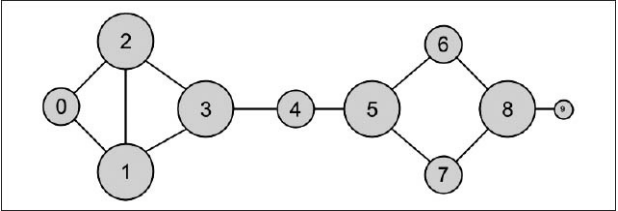

In [67]:
imagem = Image.open("/content/image-network-friends.png")
display(imagem)

In [68]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [69]:
def data_science_who_like(target_interest):
  return [user_id
          for user_id,user_interest in interests
          if user_interest == target_interest]

In [70]:
from collections import defaultdict # instancia atraves defaultdict um novo dict vazio.
import collections

In [71]:
# chaves sendo interesses, os valores sendo uma listas de user_ids com interests
user_ids_interest = defaultdict(list)
for user_id,interest in interests:
    user_ids_interest[interest].append(user_id)

# chaves são user_ids, os valores são as listas de interests para aquele user_id
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
  interests_by_user_id[user_id].append(interest)

In [72]:
def most_common_interests_with(user):
  return Counter(interested_user_id
                  for interest in interests_by_user_id[user["id"]]
                  for interested_user_id in user_ids_interest[interest]
                  if interested_user_id != user["id"])

In [73]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
(48000, 0.7), (76000, 6),
(69000, 6.5), (76000, 7.5),
(60000, 2.5), (83000, 10),
(48000, 1.9), (63000, 4.2)]

In [74]:
# as  chaves são os anos, os valores são as listas dos salários para cada ano
salary_by_tenure = defaultdict(list) # < aqui tem um dictionary, abaixo iremos preencher ele

# para cada salário e também experiência em salaries_and_ternures, iremos preencher nosso novo dict
# a chaves sera tenure, também adicionaremos salary
for salary,tenure in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)

In [80]:
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenures,salaries in salary_by_tenure.items()
}
print(average_salary_by_tenure)

{4.2: 61500.0}


In [98]:
def tenure_bucket(tenure):
  if tenure < 2:
    return "menor que dois"
  elif tenure <5:
    return "entre dois e cinco"
  else:
    return "maior que cinco"


salary_by_tenure_bucket = defaultdict(list)

for salary,tenure in salaries_and_tenures:
  bucket = tenure_bucket(tenure)
  salary_by_tenure_bucket[bucket].append(salary)
  print(salary_by_tenure_bucket)

defaultdict(<class 'list'>, {'maior que cinco': [83000]})
defaultdict(<class 'list'>, {'maior que cinco': [83000, 88000]})
defaultdict(<class 'list'>, {'maior que cinco': [83000, 88000], 'menor que dois': [48000]})
defaultdict(<class 'list'>, {'maior que cinco': [83000, 88000, 76000], 'menor que dois': [48000]})
defaultdict(<class 'list'>, {'maior que cinco': [83000, 88000, 76000, 69000], 'menor que dois': [48000]})
defaultdict(<class 'list'>, {'maior que cinco': [83000, 88000, 76000, 69000, 76000], 'menor que dois': [48000]})
defaultdict(<class 'list'>, {'maior que cinco': [83000, 88000, 76000, 69000, 76000], 'menor que dois': [48000], 'entre dois e cinco': [60000]})
defaultdict(<class 'list'>, {'maior que cinco': [83000, 88000, 76000, 69000, 76000, 83000], 'menor que dois': [48000], 'entre dois e cinco': [60000]})
defaultdict(<class 'list'>, {'maior que cinco': [83000, 88000, 76000, 69000, 76000, 83000], 'menor que dois': [48000, 48000], 'entre dois e cinco': [60000]})
defaultdict(<c

In [103]:
#as chaves são agrupamentos dos casos, os valores
# a média salarial para aquele agrupamento

average_salary_by_bucket = {
  tenure_bucket : sum(salaries) / len(salaries)
  for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

print(average_salary_by_bucket)

{'maior que cinco': 79166.66666666667, 'menor que dois': 48000.0, 'entre dois e cinco': 61500.0}


{}
